# Training an autoencoder

We first import everything we need.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from nn import nn

We can then create and instantiate the neural network architecture.

In [2]:
layers = [{"input_dim": 64, "output_dim": 16, "activation": "relu"},
          {"input_dim": 16, "output_dim": 64, "activation": "relu"}]
net = nn.NeuralNetwork(layers, lr = 0.0001, seed = 42, batch_size = 100, epochs = 100, loss_function = "mse")

To load and split the data into training and validation sets, we use functions from `sklearn`.

In [3]:
digits = load_digits()
X_train, X_val, y_train, y_val = train_test_split(digits["data"], digits["target"], test_size = 0.2, random_state = 0)
print(f"Training shape: {X_train.shape}")
print(f"Validation shape: {X_val.shape}")

Training shape: (1437, 64)
Validation shape: (360, 64)


We then train the network.

In [4]:
train_losses, val_losses = net.fit(X_train, X_train, X_val, X_val)

Finished epoch 1 of 100.
Finished epoch 21 of 100.
Finished epoch 41 of 100.
Finished epoch 61 of 100.
Finished epoch 81 of 100.


We then plot both training and validation loss over time.

Text(0.5, 1.0, 'Validation')

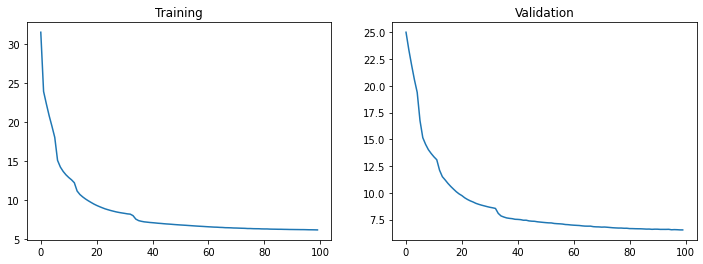

In [5]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ax[0].plot(range(100), train_losses)
ax[0].set_title("Training")
ax[1].plot(range(100), val_losses)
ax[1].set_title("Validation")

Finally, we compute the average reconstruction error over the dataset and visualize an example.

Average error over the validation set: 6.52803699587523


Text(0.5, 1.0, 'Reconstructed')

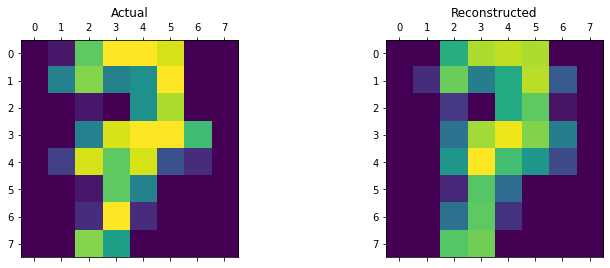

In [6]:
pred = net.predict(X_val)
print(f"Average error over the validation set: {mean_squared_error(X_val, pred)}")
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ax[0].matshow(X_val[42].reshape((8, 8)))
ax[0].set_title("Actual")
ax[1].matshow(pred[42].reshape((8, 8)))
ax[1].set_title("Reconstructed")

I chose to use MSE as the loss function since the output is continuous and not meant to be binary. For the other parameters, I simply tried various options and went with what performed best: ReLU performed better than sigmoid, a learning rate of 0.0001 performed better than 0.001 and 0.01, and a batch size of 100 performed better than a batch size of 10. I used 100 epochs from the beginning -- I tried increasing it to 1000, but it didn't really get any better.